# Import libary that essential

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Read data from file

In [42]:
data = pd.read_csv('./../data/Madrid Daily Weather 1997-2015.csv')

## Preparation

In [6]:
data.describe()

,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,...,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,WindDirDegrees
count,6810.000000,6809.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6812.000000,...,6812.000000,5872.000000,5872.000000,5872.000000,6812.000000,6812.000000,3506.000000,6812.000000,5440.000000,6812.000000
mean,21.039648,14.658687,8.640529,8.120705,4.976211,1.451248,81.139354,57.971366,34.729369,1020.529360,...,1015.217410,14.644074,11.719857,9.134877,21.953171,9.170728,43.988306,0.111182,3.206066,197.234586
std,8.867187,7.580461,6.837626,4.741067,4.654270,4.909705,17.531839,19.675744,19.320359,6.235941,...,6.944745,8.770024,5.592324,5.075065,9.903914,5.110013,12.252462,0.967174,1.808948,119.872777
min,0.000000,-3.000000,-10.000000,-12.000000,-15.000000,-22.000000,16.000000,15.000000,4.000000,994.000000,...,965.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,-1.000000
25%,13.000000,8.000000,3.000000,5.000000,2.000000,-2.000000,68.000000,41.000000,19.000000,1017.000000,...,1011.000000,10.000000,10.000000,7.000000,14.000000,6.000000,35.000000,0.000000,2.000000,66.000000
50%,20.000000,14.000000,9.000000,8.000000,6.000000,2.000000,87.000000,59.000000,32.000000,1020.000000,...,1015.000000,10.000000,10.000000,10.000000,21.000000,8.000000,42.000000,0.000000,3.000000,223.000000
75%,29.000000,21.000000,14.000000,12.000000,8.000000,5.000000,94.000000,74.000000,47.750000,1024.000000,...,1019.000000,10.000000,10.000000,10.000000,27.000000,11.000000,52.000000,0.000000,5.000000,299.000000
max,41.000000,32.000000,28.000000,20.000000,16.000000,14.000000,100.000000,100.000000,100.000000,1047.000000,...,1041.000000,31.000000,31.000000,31.000000,182.000000,39.000000,103.000000,32.000000,8.000000,360.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CET                         6812 non-null   object 
 1   Max TemperatureC            6810 non-null   float64
 2   Mean TemperatureC           6809 non-null   float64
 3   Min TemperatureC            6810 non-null   float64
 4   Dew PointC                  6810 non-null   float64
 5   MeanDew PointC              6810 non-null   float64
 6   Min DewpointC               6810 non-null   float64
 7   Max Humidity                6810 non-null   float64
 8   Mean Humidity               6810 non-null   float64
 9   Min Humidity                6810 non-null   float64
 10  Max Sea Level PressurehPa   6812 non-null   int64  
 11  Mean Sea Level PressurehPa  6812 non-null   int64  
 12  Min Sea Level PressurehPa   6812 non-null   int64  
 13  Max VisibilityKm            5872 

## Detail of data

In [3]:
data.columns = data.columns.str.strip()

In [5]:
data.groupby('Events').size()

Events
Fog                        233
Fog-Rain                    69
Fog-Rain-Snow                1
Fog-Rain-Thunderstorm        1
Fog-Snow                     4
Fog-Thunderstorm             1
Rain                      1140
Rain-Hail                    1
Rain-Hail-Thunderstorm       7
Rain-Snow                   33
Rain-Snow-Thunderstorm       1
Rain-Thunderstorm          247
Snow                        14
Thunderstorm                45
Tornado                      1
dtype: int64

## Cleaning data
- fill missing data
- handling outliers
- distinguishing and fixing errors present in the dataset

### Cleaning data cycle
- merge data set
- rebuild missing data
- standardize
- normalize
- de-duplicate
- verify and enrich

### Type of invalid data
- messy data
- missing value
- nonsensical data

In [7]:
# convert object type to datetimes type
data['CET'] = pd.to_datetime(data['CET'])

In [8]:
# select year from 2005 - 2015 that we interest
focus_data = data[(data['CET'] >= '2005-01-01')]

In [9]:
# group data by year
focus_data_year = focus_data.groupby(focus_data.CET.dt.year)

In [10]:
# find mean of temperature in a month
min_temp_y = pd.DataFrame(focus_data_year['Min TemperatureC'].mean())
max_temp_y = pd.DataFrame(focus_data_year['Max TemperatureC'].mean())
mean_temp_y = pd.DataFrame(focus_data_year['Mean TemperatureC'].mean())

In [11]:
# group max min mean
temp_y = pd.concat([min_temp_y, max_temp_y, mean_temp_y], axis=1)
temp_y

,Min TemperatureC,Max TemperatureC,Mean TemperatureC
CET,,,
2005,8.156164,21.194521,14.465753
2006,9.178082,21.413699,15.027397
2007,7.457534,19.961644,13.515068
2008,8.122951,20.360656,14.073770
2009,8.980822,21.652055,15.115068
2010,9.005479,20.284932,14.380822
2011,9.221918,22.076712,15.454795
2012,8.046448,21.240437,14.527322
2013,8.191781,20.939726,14.539726


In [12]:
# focusing data with lastest year
focus_data_month = data[(data['CET'] >= '2015-01-01')]

In [13]:
# group data by month
focus_data_month = focus_data_month.groupby(focus_data_month.CET.dt.month)

In [14]:
# mean of max, min and mean value
min_temp_m = pd.DataFrame(focus_data_month['Min TemperatureC'].mean())
max_temp_m = pd.DataFrame(focus_data_month['Max TemperatureC'].mean())
mean_temp_m = pd.DataFrame(focus_data_month['Mean TemperatureC'].mean())

In [15]:
# group three data
temp_m = pd.concat([min_temp_m, max_temp_m, mean_temp_m], axis=1)
temp_m

,Min TemperatureC,Max TemperatureC,Mean TemperatureC
CET,,,
1,-1.483871,11.903226,5.161290
2,1.785714,11.464286,6.464286
3,3.677419,17.354839,10.516129
4,7.466667,20.700000,14.066667
5,11.451613,27.354839,19.451613
6,15.833333,31.400000,23.633333
7,20.612903,36.903226,28.806452
8,17.967742,32.741935,25.290323
9,13.033333,27.066667,20.033333


## Manage outlier data

In [16]:
focus_data.describe()

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,WindDirDegrees
count,4017,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,...,4017.000000,3442.000000,3442.000000,3442.000000,4017.000000,4017.000000,2795.000000,4017.000000,3028.000000,4017.000000
mean,2010-07-02 00:00:00.000000256,21.260393,14.791636,8.629076,7.834703,4.640279,1.019417,80.013941,56.388350,32.218820,...,1014.692806,17.991575,13.324521,9.842243,22.594225,9.587752,44.226118,0.188541,3.019485,201.631317
min,2005-01-01 00:00:00,0.000000,-3.000000,-10.000000,-12.000000,-15.000000,-22.000000,26.000000,15.000000,4.000000,...,980.000000,4.000000,1.000000,0.000000,6.000000,2.000000,21.000000,0.000000,0.000000,1.000000
25%,2007-10-02 00:00:00,13.000000,8.000000,3.000000,5.000000,2.000000,-2.000000,66.000000,39.000000,16.000000,...,1011.000000,10.000000,10.000000,7.000000,14.000000,6.000000,35.000000,0.000000,1.000000,89.000000
50%,2010-07-02 00:00:00,21.000000,14.000000,9.000000,8.000000,5.000000,1.000000,86.000000,57.000000,29.000000,...,1015.000000,10.000000,10.000000,10.000000,23.000000,8.000000,45.000000,0.000000,3.000000,226.000000
75%,2013-04-01 00:00:00,29.000000,22.000000,14.000000,11.000000,8.000000,4.000000,94.000000,73.000000,45.000000,...,1019.000000,31.000000,15.000000,10.000000,27.000000,11.000000,52.000000,0.000000,4.000000,302.000000
max,2015-12-31 00:00:00,41.000000,31.000000,26.000000,20.000000,16.000000,14.000000,100.000000,99.000000,93.000000,...,1041.000000,31.000000,31.000000,31.000000,132.000000,39.000000,98.000000,32.000000,8.000000,360.000000
std,NaN,8.992134,7.721958,6.986600,4.836269,4.747541,4.994730,18.170159,20.034347,19.275916,...,7.021043,10.193518,6.776382,6.069474,9.934379,5.059933,12.324430,1.253739,1.798749,118.245321


## Analysis data

### topic 
- how different of data in range between 10 year
- what is pattern of temperature in each year
- Max temperature average in a year
- Min temperature average in a year
- 

(0.0, 40.0)

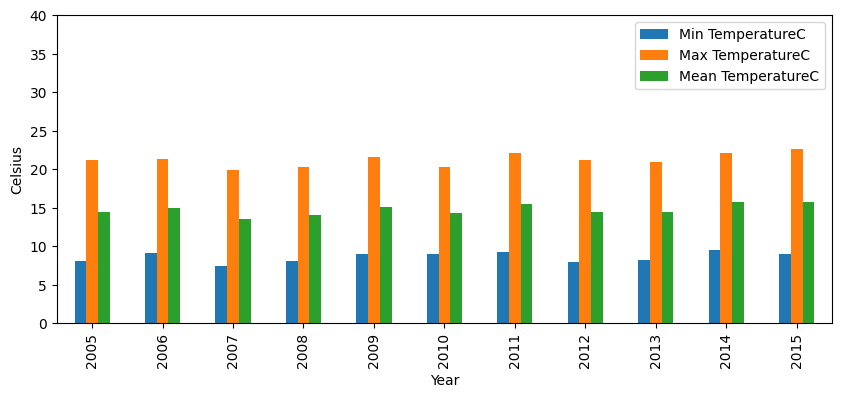

In [33]:
# temperature per year
temp_y.plot(kind="bar", figsize = (10, 4))
plt.xlabel("Year")
plt.ylabel("Celsius")
plt.ylim(0,40)

(-5.0, 40.0)

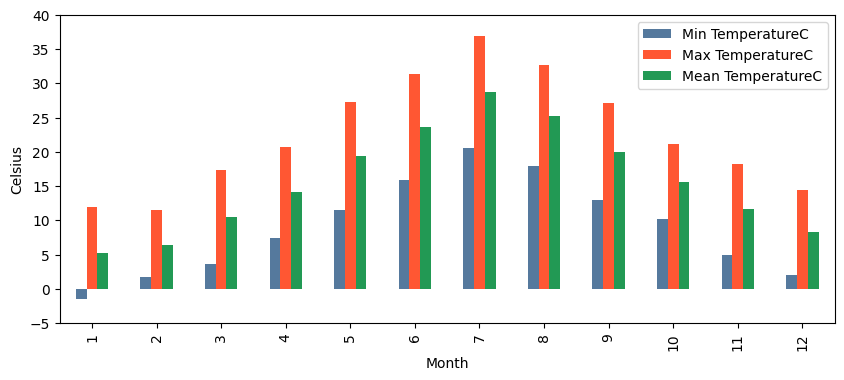

In [41]:
# temperature in latest year
temp_m.plot(kind="bar", figsize = (10, 4), color={'Max TemperatureC': '#FF5733', 'Mean TemperatureC': '#229954', 'Min TemperatureC': '#55799D'})
# temp_m.plot(kind="bar", figsize = (10, 4), color=['blue', 'oran'])
plt.xlabel("Month")
plt.ylabel("Celsius")
plt.ylim(-5,40)

## test

## useful link
- https://www.analyticsvidhya.com/blog/2021/06/data-cleaning-using-pandas/#What_Is_Data_Cleaning? (cleaning data)
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html (pandas school)